***Step 1: Importing necessary libraries***

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

***Step 2: Load and Explore the Dataset***

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [ ]:
df.head()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


***Step 3: Visualize the Data***

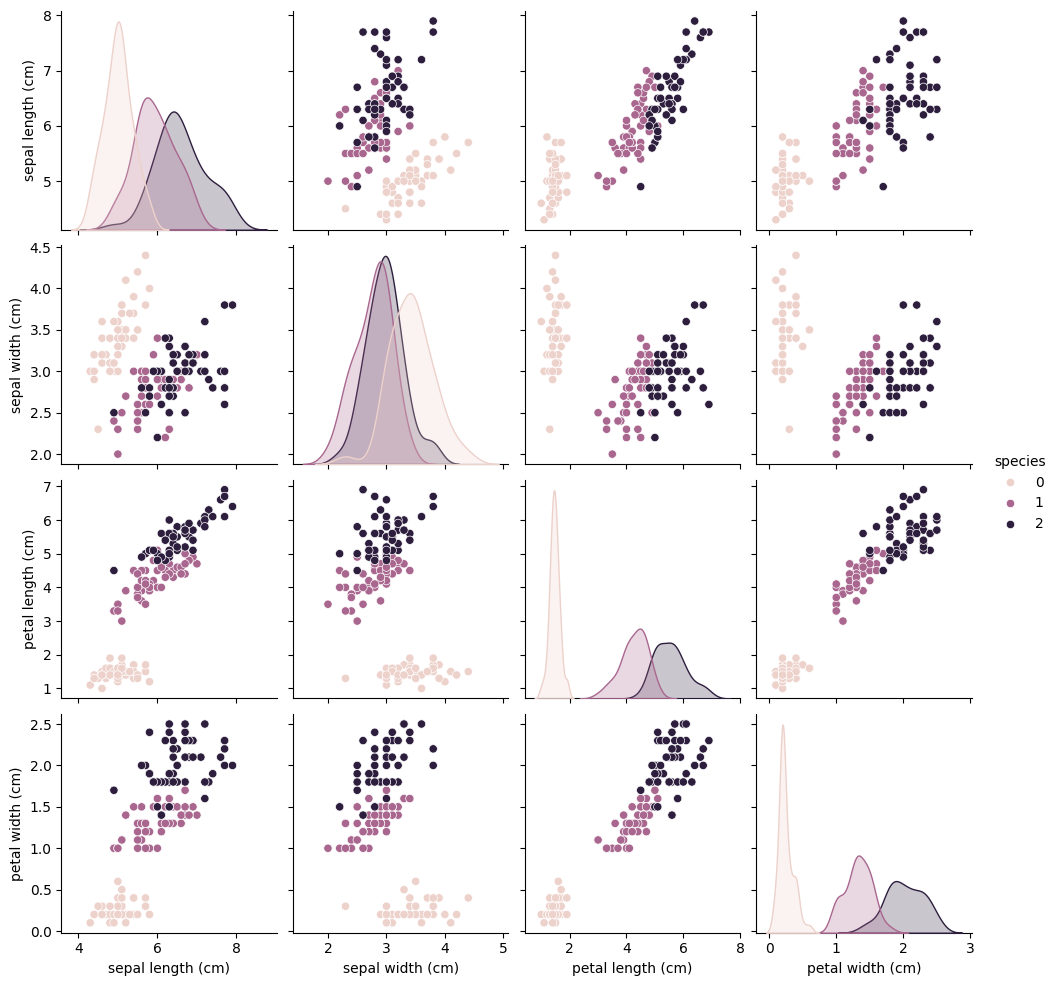

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

***Step 4: Preprocess the Data***

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***Step 5: Train the Model***

In [ ]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

***Step 6: Evaluate the Model***

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



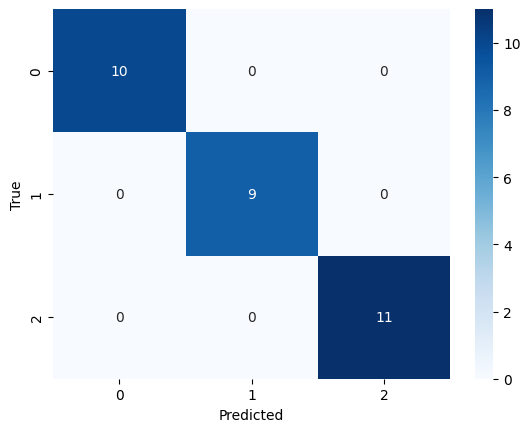

In [ ]:
# Make predictions
y_pred = knn.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


***Step 7: Try Other Classification Models***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Report:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Report:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Results:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



***Step 8: Hyperparameter Tuning (Grid Search)***

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 11)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best K:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best K: {'n_neighbors': np.int64(3)}
Best Score: 0.95


***Step 9: Feature Importance (for Tree-based models)***

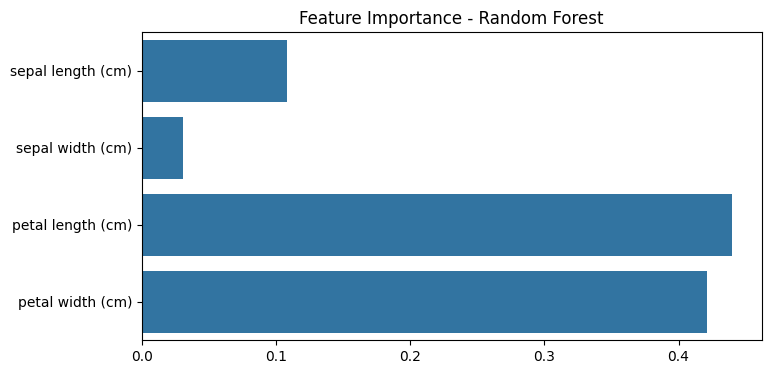

In [ ]:
# Feature importance from Random Forest
importances = rf.feature_importances_
feature_names = iris.feature_names

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.show()


***Step 10: Random Forest Decision Boundary Visualization***

In [ ]:
# Prepare the Data
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [ ]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_std, y)


RandomForestClassifier(random_state=42)

/tmp/ipython-input-303333016.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


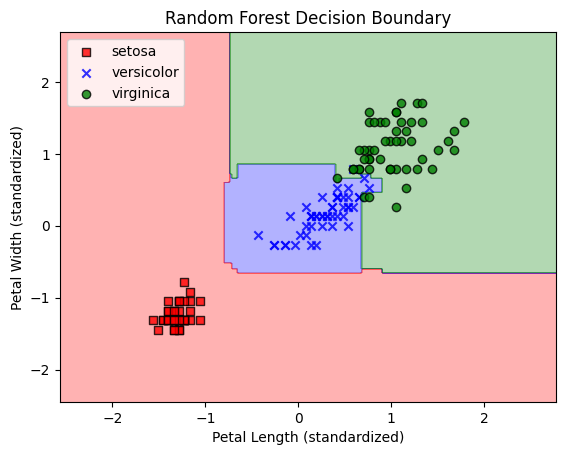

In [ ]:
# Plot Decision Boundaries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Meshgrid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predict
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=iris.target_names[cl],
                    edgecolor='black')

    plt.xlabel('Petal Length (standardized)')
    plt.ylabel('Petal Width (standardized)')
    plt.legend(loc='upper left')
    plt.title('Random Forest Decision Boundary')
    plt.show()

# Call the function
plot_decision_regions(X_std, y, classifier=rf)


***Step 11: KNN Decision Boundary Visualization***

/tmp/ipython-input-3148896302.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


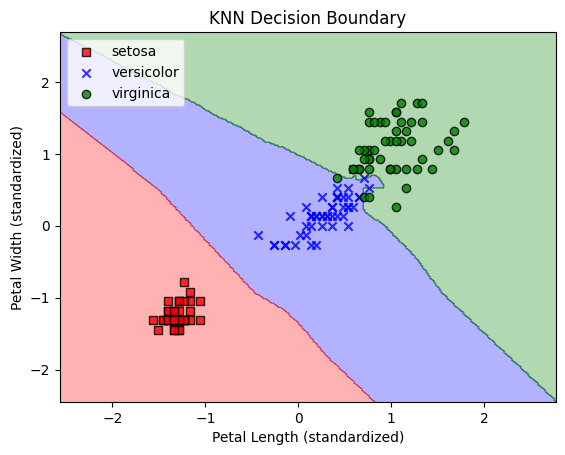

In [ ]:
# Define decision boundary plot function
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Meshgrid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predict
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot decision surface
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=iris.target_names[cl],
                    edgecolor='black')

    plt.xlabel('Petal Length (standardized)')
    plt.ylabel('Petal Width (standardized)')
    plt.legend(loc='upper left')
    plt.title('KNN Decision Boundary')
    plt.show()

# Train a new KNN classifier on the two features used for plotting
knn_plot = KNeighborsClassifier(n_neighbors=3)
knn_plot.fit(X_std, y)

# Call the function with the new KNN classifier
plot_decision_regions(X_std, y, classifier=knn_plot)

***Step 12: Compare Model Performance***

In [ ]:
# Evaluate KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# KNN predictions
y_pred_knn = knn.predict(X_test)

# KNN metrics
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

KNN Accuracy: 1.0
KNN Precision: 1.0
KNN Recall: 1.0
KNN F1 Score: 1.0


In [ ]:
# Evaluate Random Forest
# Random Forest predictions
y_pred_rf = rf.predict(X_std)

# Random Forest metrics
print("Random Forest Accuracy:", accuracy_score(y, y_pred_rf))
print("Random Forest Precision:", precision_score(y, y_pred_rf, average='weighted'))
print("Random Forest Recall:", recall_score(y, y_pred_rf, average='weighted'))
print("Random Forest F1 Score:", f1_score(y, y_pred_rf, average='weighted'))


Random Forest Accuracy: 0.9933333333333333
Random Forest Precision: 0.9934640522875816
Random Forest Recall: 0.9933333333333333
Random Forest F1 Score: 0.9933326665999933


In [ ]:
# Summary Table
results = pd.DataFrame({
    'Model': ['KNN', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn), accuracy_score(y, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_knn, average='weighted'), precision_score(y, y_pred_rf, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_knn, average='weighted'), recall_score(y, y_pred_rf, average='weighted')],
    'F1 Score': [f1_score(y_test, y_pred_knn, average='weighted'), f1_score(y, y_pred_rf, average='weighted')]
})

print(results)

           Model  Accuracy  Precision    Recall  F1 Score
0            KNN  1.000000   1.000000  1.000000  1.000000
1  Random Forest  0.993333   0.993464  0.993333  0.993333


***Step 13: Hyperparameter Tuning with GridSearchCV***

In [ ]:
# KNN Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search with 5-fold CV
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Best parameters and score
print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN Accuracy:", grid_knn.best_score_)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN Accuracy: 0.9583333333333334


In [ ]:
# Random Forest Tuning
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search with 5-fold CV
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF Accuracy:", grid_rf.best_score_)


Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best RF Accuracy: 0.9583333333333334


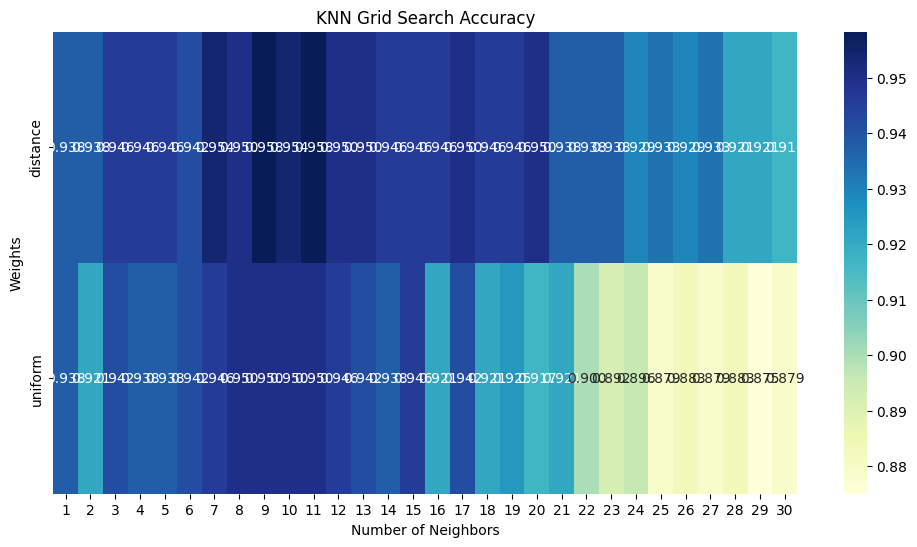

In [ ]:
# KNN Grid Search Heatmap

# Extract results from GridSearchCV
results_knn = pd.DataFrame(grid_knn.cv_results_)

# Pivot table for heatmap
pivot_knn = results_knn.pivot_table(
    values='mean_test_score',
    index='param_weights',
    columns='param_n_neighbors'
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_knn, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("KNN Grid Search Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Weights")
plt.show()


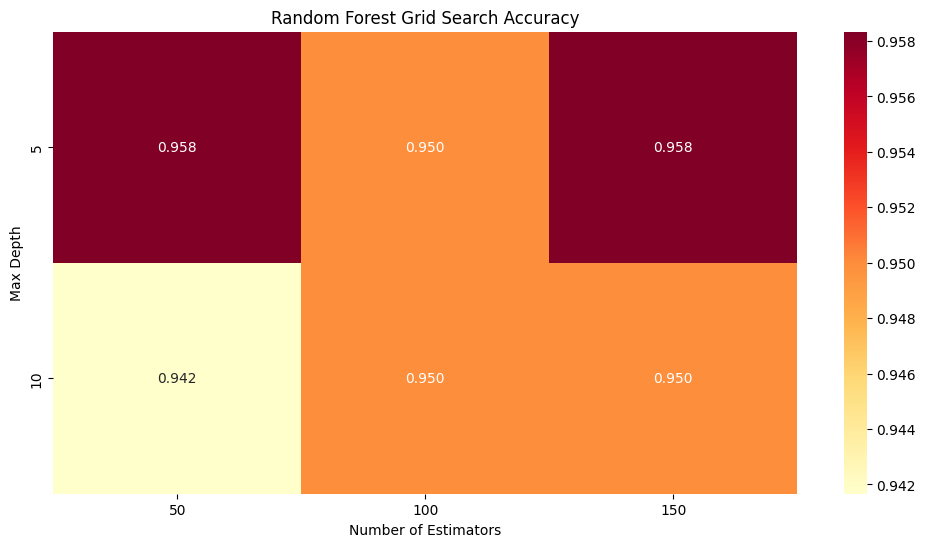

In [ ]:
# Random Forest Grid Search Heatmap

# Extract results from GridSearchCV
results_rf = pd.DataFrame(grid_rf.cv_results_)

# Filter for one value of min_samples_split and min_samples_leaf to simplify
filtered_rf = results_rf[
    (results_rf['param_min_samples_split'] == 2) &
    (results_rf['param_min_samples_leaf'] == 1)
]

# Pivot table for heatmap
pivot_rf = filtered_rf.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_n_estimators'
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_rf, annot=True, fmt=".3f", cmap="YlOrRd")
plt.title("Random Forest Grid Search Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Max Depth")
plt.show()


***Step 14: Model Interpretation and Insights***

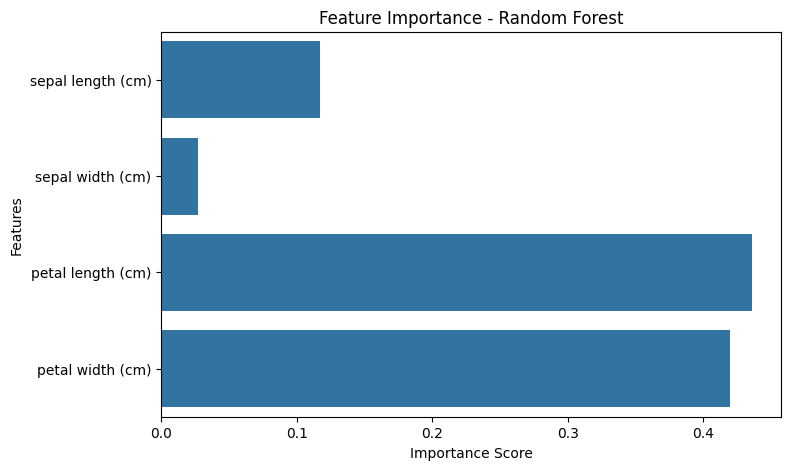

In [ ]:
# For Random Forest: Feature Importance
# Get feature importances
importances = grid_rf.best_estimator_.feature_importances_
features = iris.feature_names

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

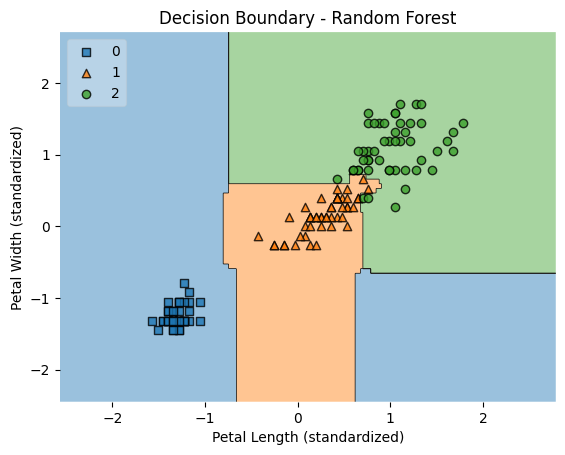

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

# Use only two features for 2D visualization
X_vis = iris.data[:, [2, 3]]  # Select petal length and petal width
y_vis = iris.target

# Scale the selected features
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Fit model with best parameters
rf_vis = RandomForestClassifier(**grid_rf.best_params_)
rf_vis.fit(X_vis_scaled, y_vis)

# Plot decision regions
plot_decision_regions(X_vis_scaled, y_vis, clf=rf_vis, legend=2)
plt.xlabel("Petal Length (standardized)")
plt.ylabel("Petal Width (standardized)")
plt.title("Decision Boundary - Random Forest")
plt.show()

***Step 15: Final conclusions***

In [ ]:
from sklearn.metrics import classification_report

# Final predictions
y_final_pred = grid_rf.best_estimator_.predict(X_test)

# Final evaluation
print(classification_report(y_test, y_final_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

